# Yêu cầu 1

In [1]:
data = read.csv("./data/marketing.csv")
data = data[c("youtube", "sales")]

In [2]:
head(data)

,youtube,sales
,<dbl>,<dbl>
1,276.12,26.52
2,53.40,12.48
3,20.64,11.16
4,181.80,22.20
5,216.96,15.48
6,10.44,8.64


In [3]:
nrow(data)

[1] 200

In [4]:
ncol(data)

[1] 2

In [5]:
str(data)

'data.frame':	200 obs. of  2 variables:
 $ youtube: num  276.1 53.4 20.6 181.8 217 ...
 $ sales  : num  26.5 12.5 11.2 22.2 15.5 ...


In [6]:
summary(data)

    youtube           sales      
 Min.   :  0.84   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:12.45  
 Median :179.70   Median :15.48  
 Mean   :176.45   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:20.88  
 Max.   :355.68   Max.   :32.40  

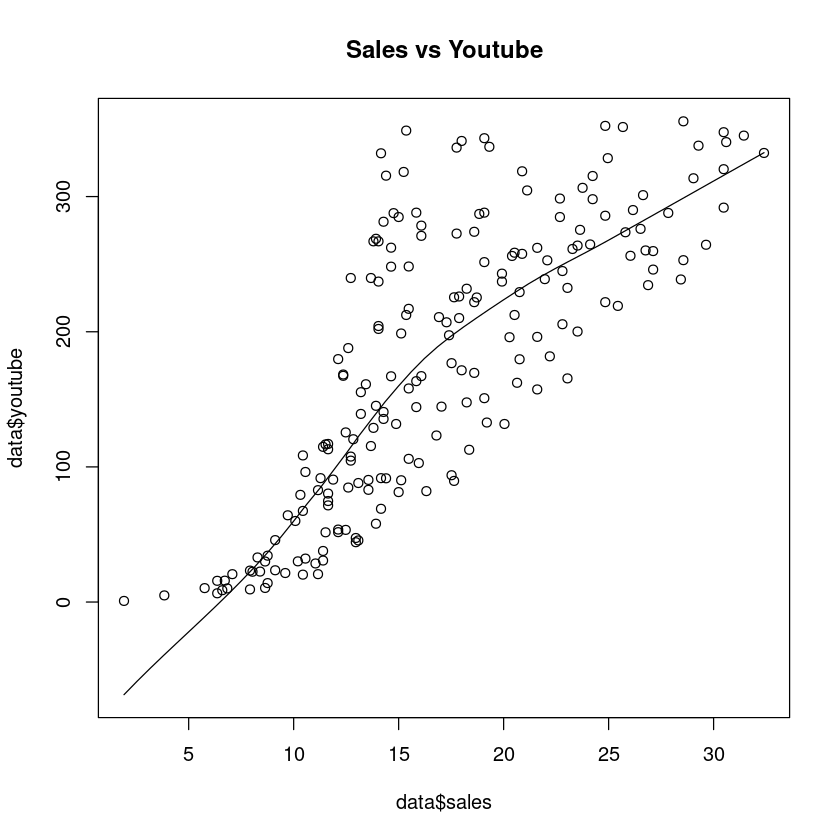

In [7]:
scatter.smooth(x = data$sales, y = data$youtube,
               main = 'Sales vs Youtube')

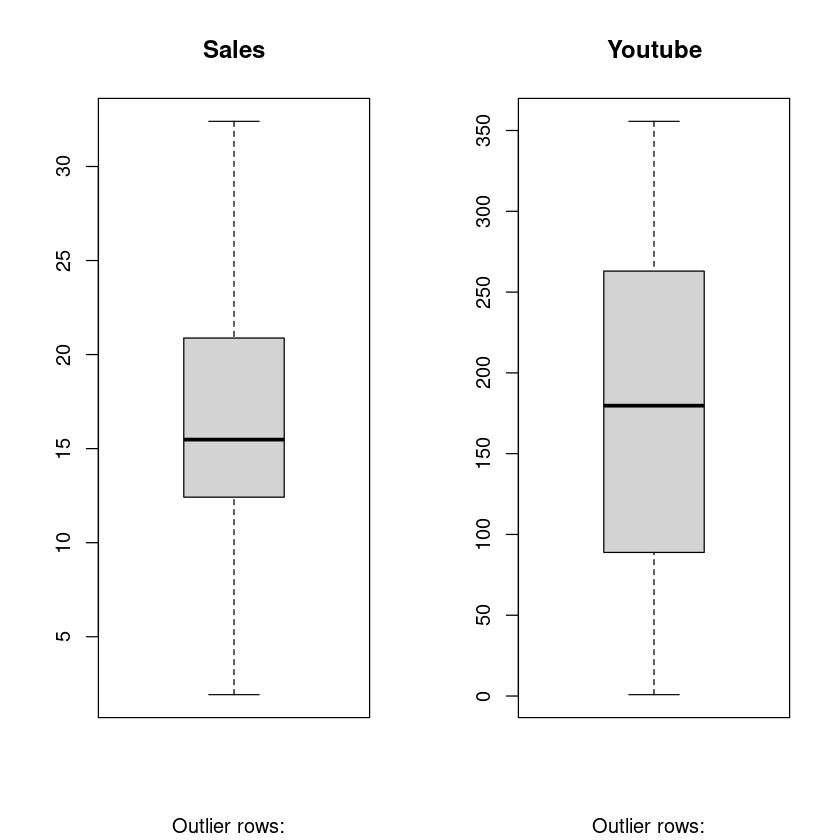

In [8]:
par(mfrow = c(1, 2))
boxplot(data$sales, main = 'Sales',
        sub = paste('Outlier rows: ', boxplot.stats(data$sales)$out))
boxplot(data$youtube, main = 'Youtube',
        sub = paste('Outlier rows: ', boxplot.stats(data$youtube)$out))

> **Nhận xét**
> * Ko có outlier và cũng ko cần tiền xử lí

In [9]:
set.seed(42)

trainingRowIndex = sample(1:nrow(data), 0.8*nrow(data))
trainingData = data[trainingRowIndex,]
testData = data[-trainingRowIndex,]

In [10]:
lmMod = lm(sales ~ youtube, data = trainingData)

In [11]:
summary(lmMod)


Call:
lm(formula = sales ~ youtube, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3338 -2.4283 -0.2168  2.4492  8.8434 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.552763   0.615487    13.9   <2e-16 ***
youtube     0.046271   0.002965    15.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.837 on 158 degrees of freedom
Multiple R-squared:  0.6065,	Adjusted R-squared:  0.604 
F-statistic: 243.5 on 1 and 158 DF,  p-value: < 2.2e-16


In [12]:
y_test_predict = predict(lmMod, testData)

In [13]:
data.frame(Predicted = y_test_predict, True_value =  testData$sales)

,Predicted,True_value
,<dbl>,<dbl>
7,11.745430,14.16
8,15.226826,15.84
11,12.222942,10.32
17,12.317334,15.00
19,12.395069,13.56
22,21.734314,15.00
23,9.285689,6.72
30,12.472803,12.60
39,10.945875,12.12


In [14]:
mse_test = mean((testData$sales - y_test_predict)^2)

mse_test

[1] 17.68811

In [15]:
mse_train = mean((trainingData$sales - predict(lmMod, trainingData))^2)

mse_train

[1] 14.53697

> **Nhận xét**
> * MSE trên train và trên test chênh lệch ít, model ko hề bị overfitting hay underfitting

In [16]:
coef = coef(lmMod)['youtube']

coef

youtube 
0.04627054

In [17]:
intercept = coef(lmMod)['(Intercept)']

intercept

(Intercept) 
   8.552763

In [18]:
x = c(100., 200., 300.)
y = intercept + coef * x

y

[1] 13.17982 17.80687 22.43392

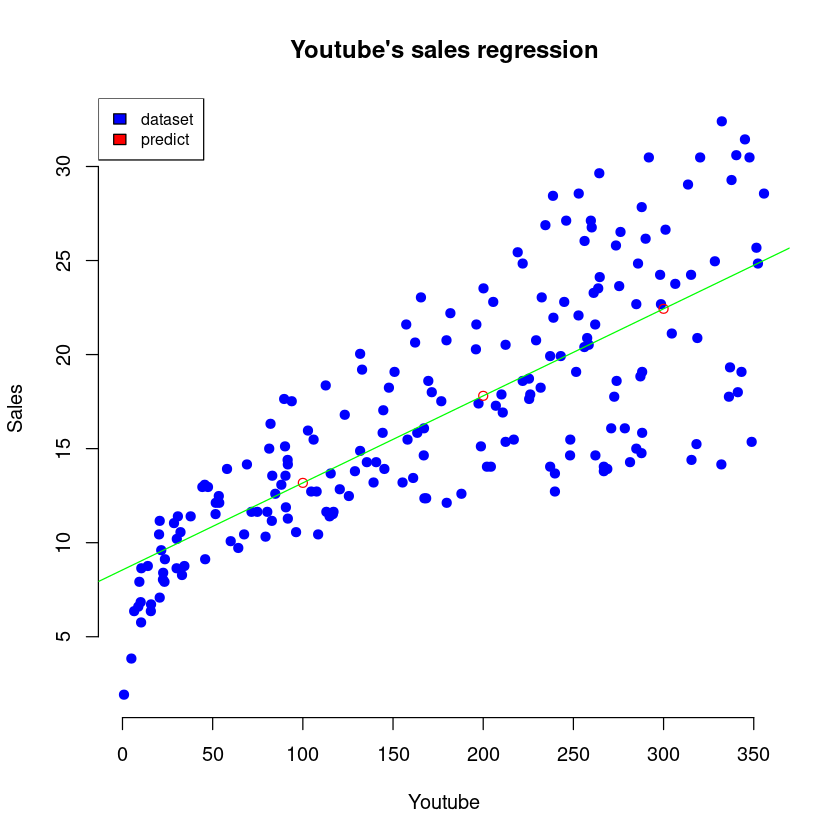

In [19]:
plot(data$youtube, data$sales, main = "Youtube's sales regression",
     xlab = 'Youtube', ylab = 'Sales', pch = 19, frame = F, col = 'blue')
lines(x, y, col = 'red', type = 'p')
abline(lmMod, data, col = 'green')
legend('topleft', c('dataset', 'predict'), cex = 0.8, fill = c('blue', 'red'))

# Yêu cầu 2

In [20]:
data1 = read.csv("./data/marketing.csv")

In [21]:
head(data1)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


In [22]:
str(data1)

'data.frame':	200 obs. of  4 variables:
 $ youtube  : num  276.1 53.4 20.6 181.8 217 ...
 $ facebook : num  45.4 47.2 55.1 49.6 13 ...
 $ newspaper: num  83 54.1 83.2 70.2 70.1 ...
 $ sales    : num  26.5 12.5 11.2 22.2 15.5 ...


In [23]:
dim(data1)

[1] 200   4

In [24]:
summary(data1)

    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

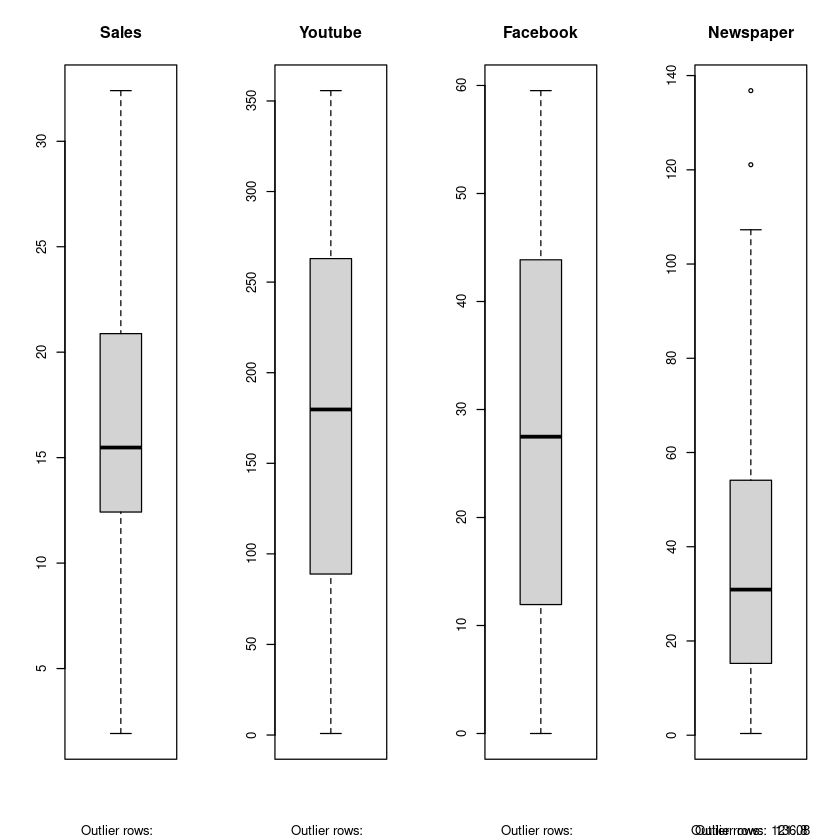

In [25]:
par(mfrow = c(1, 4))
boxplot(data1$sales, main = 'Sales',
        sub = paste('Outlier rows: ', boxplot.stats(data1$sales)$out))
boxplot(data1$youtube, main = 'Youtube',
        sub = paste('Outlier rows: ', boxplot.stats(data1$youtube)$out))
boxplot(data1$facebook, main = 'Facebook',
        sub = paste('Outlier rows: ', boxplot.stats(data1$facebook)$out))
boxplot(data1$newspaper, main = 'Newspaper',
        sub = paste('Outlier rows: ', boxplot.stats(data1$newspaper)$out))

> **Nhận xét**
> * Cần loại bỏ outlier của `newspaper`

In [26]:
newspaper_outliers = boxplot.stats(data1$newspaper)$out
data1 = data1[!(data1$newspaper %in% newspaper_outliers),]

In [27]:
head(data1)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


In [28]:
set.seed(42)

trainingRowIndex1 = sample(1:nrow(data1), 0.7*nrow(data1))
trainingData1 = data1[trainingRowIndex1,]
testData1 = data1[-trainingRowIndex1,]

In [29]:
lmMod1 = lm(sales ~ youtube + facebook + newspaper, data = trainingData1)

In [30]:
summary(lmMod1)


Call:
lm(formula = sales ~ youtube + facebook + newspaper, data = trainingData1)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7341 -1.0925  0.2395  1.4153  3.1875 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.971115   0.449788   8.829  5.1e-15 ***
youtube      0.043598   0.001636  26.653  < 2e-16 ***
facebook     0.191722   0.009544  20.089  < 2e-16 ***
newspaper   -0.003361   0.007215  -0.466    0.642    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.93 on 134 degrees of freedom
Multiple R-squared:  0.899,	Adjusted R-squared:  0.8967 
F-statistic: 397.4 on 3 and 134 DF,  p-value: < 2.2e-16


In [31]:
y_test_predict1 = predict(lmMod1, testData1)

In [32]:
y_test_predict1

7         8        10        11        18        20        23        24 
14.430758 14.722150 14.936732  8.666056 27.578729 17.098980  8.119716 19.697558 
       29        31        40        45        46        47        49        51 
23.130049 25.631438 24.443861 11.022353 18.181289 10.797631 19.291349 14.997721 
       52        53        57        60        62        67        68        71 
11.417869 24.726598 10.650933 21.743781 27.244799 11.269873 14.553711 21.271401 
       76        78        85        91        94        95       109       119 
14.548626 16.774954 24.897358 12.087114 25.203303 12.766940  4.645245 18.717406 
      122       123       125       126       127       131       137       142 
 9.743853 16.179378 23.109775 11.143491 13.124708 13.083295 14.245530 21.944385 
      146       147       149       154       157       161       162       165 
11.712026 18.176839 15.182862 21.914628 18.687917 17.036197 16.492243 13.462877 
      174       178       179       182       184       185       187       190 
14.363156 14.528030 18.880811 16.534243 28.620790 22.028611 11.645201  7.638876 
      193       194       197       199 
 5.686793 22.345887  9.994040 28.204041

In [33]:
mse_train1 = mean(lmMod1$residuals^2)

mse_train1

[1] 3.618064

In [34]:
mse_test1 = mean((testData1$sales - y_test_predict1)^2)

mse_test1

[1] 5.212035

In [36]:
intercept1 = coef(lmMod1)[1]

intercept1

(Intercept) 
   3.971115

In [37]:
coef_1 = coef(lmMod1)[2]

coef_1

youtube 
0.04359755

In [38]:
coef_2 = coef(lmMod1)[3]

coef_2

facebook 
0.1917224

In [39]:
coef_3 = coef(lmMod1)[4]

coef_3

newspaper 
-0.003360998